In [24]:
#데이터 불러오기
import pandas as pd
df=pd.read_csv('../data/df_top15.csv')

In [25]:
df

,년,월,국적지역,입국자수,날짜
0,2018,1,대만,78321,2018-01-01
1,2018,2,대만,90673,2018-02-01
2,2018,3,대만,96811,2018-03-01
3,2018,4,대만,107719,2018-04-01
4,2018,5,대만,91102,2018-05-01
...,...,...,...,...,...
712,2024,8,홍콩,61592,2024-08-01
713,2024,9,홍콩,39815,2024-09-01
714,2024,10,홍콩,52005,2024-10-01
715,2024,11,홍콩,46366,2024-11-01


In [26]:
import numpy as np

# 월 데이터를 계절성 반영되도록 수정
df['월_sin'] = np.sin(2 * np.pi * df['월'] / 12)
df['월_cos'] = np.cos(2 * np.pi * df['월'] / 12)

In [27]:
df

,년,월,국적지역,입국자수,날짜,월_sin,월_cos
0,2018,1,대만,78321,2018-01-01,5.000000e-01,8.660254e-01
1,2018,2,대만,90673,2018-02-01,8.660254e-01,5.000000e-01
2,2018,3,대만,96811,2018-03-01,1.000000e+00,6.123234e-17
3,2018,4,대만,107719,2018-04-01,8.660254e-01,-5.000000e-01
4,2018,5,대만,91102,2018-05-01,5.000000e-01,-8.660254e-01
...,...,...,...,...,...,...,...
712,2024,8,홍콩,61592,2024-08-01,-8.660254e-01,-5.000000e-01
713,2024,9,홍콩,39815,2024-09-01,-1.000000e+00,-1.836970e-16
714,2024,10,홍콩,52005,2024-10-01,-8.660254e-01,5.000000e-01
715,2024,11,홍콩,46366,2024-11-01,-5.000000e-01,8.660254e-01


In [28]:
# 원핫 인코딩 적용
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)  # 최신 버전에서는 sparse_output 사용
encoded_countries = encoder.fit_transform(df[['국적지역']])

encoded_df = pd.DataFrame(encoded_countries, columns=encoder.get_feature_names_out(['국적지역']))

# 기존 데이터프레임과 병합
df_encoded = pd.concat([df[['년', '월_sin', '월_cos', '입국자수']], encoded_df], axis=1)

In [29]:
df_encoded

,년,월_sin,월_cos,입국자수,국적지역_러시아,국적지역_말레이시아,국적지역_미국,국적지역_베트남,국적지역_싱가포르,국적지역_영국,국적지역_오스트레일리아,국적지역_인도네시아,국적지역_일본,국적지역_중국,국적지역_캐나다,국적지역_태국,국적지역_필리핀,국적지역_홍콩
0,2018,5.000000e-01,8.660254e-01,78321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018,8.660254e-01,5.000000e-01,90673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018,1.000000e+00,6.123234e-17,96811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018,8.660254e-01,-5.000000e-01,107719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018,5.000000e-01,-8.660254e-01,91102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2024,-8.660254e-01,-5.000000e-01,61592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
713,2024,-1.000000e+00,-1.836970e-16,39815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
714,2024,-8.660254e-01,5.000000e-01,52005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
715,2024,-5.000000e-01,8.660254e-01,46366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [30]:
from sklearn.linear_model import LinearRegression

# 독립 변수(X)와 종속 변수(y) 설정
X = df_encoded.drop(columns=['입국자수'])
y = df_encoded['입국자수']



In [31]:
X

,년,월_sin,월_cos,국적지역_러시아,국적지역_말레이시아,국적지역_미국,국적지역_베트남,국적지역_싱가포르,국적지역_영국,국적지역_오스트레일리아,국적지역_인도네시아,국적지역_일본,국적지역_중국,국적지역_캐나다,국적지역_태국,국적지역_필리핀,국적지역_홍콩
0,2018,5.000000e-01,8.660254e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018,8.660254e-01,5.000000e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018,1.000000e+00,6.123234e-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018,8.660254e-01,-5.000000e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018,5.000000e-01,-8.660254e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2024,-8.660254e-01,-5.000000e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
713,2024,-1.000000e+00,-1.836970e-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
714,2024,-8.660254e-01,5.000000e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
715,2024,-5.000000e-01,8.660254e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [32]:
#스케일링은 제외 : 데이터의 해석 가능성 유지

#트레이닝, 테스트 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

#모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:
# 예측 수행
y_pred = model.predict(X_test)

In [34]:
#성능평가
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.8299838034549563

In [13]:
# 2025년, 2026년 데이터를 생성하여 예측
future_years = [2025, 2026]
future_months = list(range(1, 13))  # 1월~12월
# 기존 데이터에서 국적 리스트 추출
countries = encoder.get_feature_names_out(['국적지역'])
# 예측을 위한 데이터 생성
future_data = []
for year in future_years:
    for month in future_months:
        for country in countries:
            # 국가별 원핫 인코딩 값 생성
            country_encoding = [1 if c == country else 0 for c in countries]
            future_data.append([year, month] + country_encoding)
            # 월을 사인/코사인 값으로 변환

# 데이터프레임 변환
future_df = pd.DataFrame(future_data, columns=['년', '월'] + list(countries))

# 월을 사인/코사인 값으로 변환 (훈련 데이터와 동일한 변환 방식 적용)
future_df['월_sin'] = np.sin(2 * np.pi * future_df['월'] / 12)
future_df['월_cos'] = np.cos(2 * np.pi * future_df['월'] / 12)

# '월' 컬럼 삭제 (훈련 데이터에 없었으므로 제거)
future_df = future_df.drop(columns=['월'])

# 훈련 데이터와 동일한 컬럼 순서 유지
future_df = future_df[X_train.columns]

# 선형 회귀 모델을 사용하여 미래 입국자 수 예측
future_predictions = model.predict(future_df)

# 예측값을 반올림하여 정수 변환
future_df['예측 입국자수'] = np.round(future_predictions).astype(int)

#각 국적지역-국적 컬럼을 원래처럼 변환
future_df['국적지역'] = future_df[countries].idxmax(axis=1)

# 년, 월, 국적지역, 예측 입국자수 컬럼만 선택
future_df = future_df[['년', '월_sin', '월_cos', '국적지역', '예측 입국자수']]

future_df

,년,월_sin,월_cos,국적지역,예측 입국자수
0,2025,5.000000e-01,0.866025,국적지역_러시아,7090
1,2025,5.000000e-01,0.866025,국적지역_말레이시아,13771
2,2025,5.000000e-01,0.866025,국적지역_미국,84838
3,2025,5.000000e-01,0.866025,국적지역_베트남,33939
4,2025,5.000000e-01,0.866025,국적지역_싱가포르,9594
...,...,...,...,...,...
331,2026,-2.449294e-16,1.000000,국적지역_중국,376682
332,2026,-2.449294e-16,1.000000,국적지역_캐나다,3697
333,2026,-2.449294e-16,1.000000,국적지역_태국,26157
334,2026,-2.449294e-16,1.000000,국적지역_필리핀,25653


In [14]:
# 월_sin, 월_cos를 원래 월 값으로 변환
future_df['월'] = np.round(
    (np.arctan2(future_df['월_sin'], future_df['월_cos']) / (2 * np.pi) * 12) + 1
).astype(int)

# 음수 값이 나오지 않도록 보정 (1~12 범위로 변환)
future_df['월'] = future_df['월'] % 12
future_df['월'] = future_df['월'].replace(0, 12)  # 0이 나오면 12로 변경

# 변환 후 필요 없는 월_sin, 월_cos 삭제
future_df = future_df.drop(columns=['월_sin', '월_cos'])

In [15]:
#국적지역 컬럼 밸류들에 국적지역_ 삭제
future_df['국적지역'] = future_df['국적지역'].str.replace('국적지역_', '')

In [16]:
#컬럼순서 변경
future_df = future_df[['년', '월', '국적지역', '예측 입국자수']]

In [17]:
future_df['월'].unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1])

In [18]:
# 국적지역 > 년 > 월 순서로 정렬
future_df = future_df.sort_values(by=['국적지역', '년', '월']).reset_index(drop=True)

In [19]:
future_df[future_df['국적지역']=='미국']

,년,월,국적지역,예측 입국자수
48,2025,1,미국,87939
49,2025,2,미국,84838
50,2025,3,미국,83592
51,2025,4,미국,84534
52,2025,5,미국,87412
53,2025,6,미국,91454
54,2025,7,미국,95578
55,2025,8,미국,98678
56,2025,9,미국,99925
57,2025,10,미국,98982


In [20]:
df[df['국적지역']=='미국']

,년,월,국적지역,입국자수,날짜,월_sin,월_cos
144,2018,1,미국,68071,2018-01-01,5.000000e-01,8.660254e-01
145,2018,2,미국,76797,2018-02-01,8.660254e-01,5.000000e-01
146,2018,3,미국,87866,2018-03-01,1.000000e+00,6.123234e-17
147,2018,4,미국,100670,2018-04-01,8.660254e-01,-5.000000e-01
148,2018,5,미국,92902,2018-05-01,5.000000e-01,-8.660254e-01
149,2018,6,미국,102403,2018-06-01,1.224647e-16,-1.000000e+00
150,2018,7,미국,98111,2018-07-01,-5.000000e-01,-8.660254e-01
151,2018,8,미국,84466,2018-08-01,-8.660254e-01,-5.000000e-01
152,2018,9,미국,85895,2018-09-01,-1.000000e+00,-1.836970e-16
153,2018,10,미국,108108,2018-10-01,-8.660254e-01,5.000000e-01


In [21]:
# 점수는 높았지만 가중치가 음수가 되면서 예측값이 마이너스가 나오는 경우가 있었음

In [22]:
#한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


plt.rcParams['font.family'] = 'NanumGothic'  # 리눅스에서 한글 폰트 사용

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

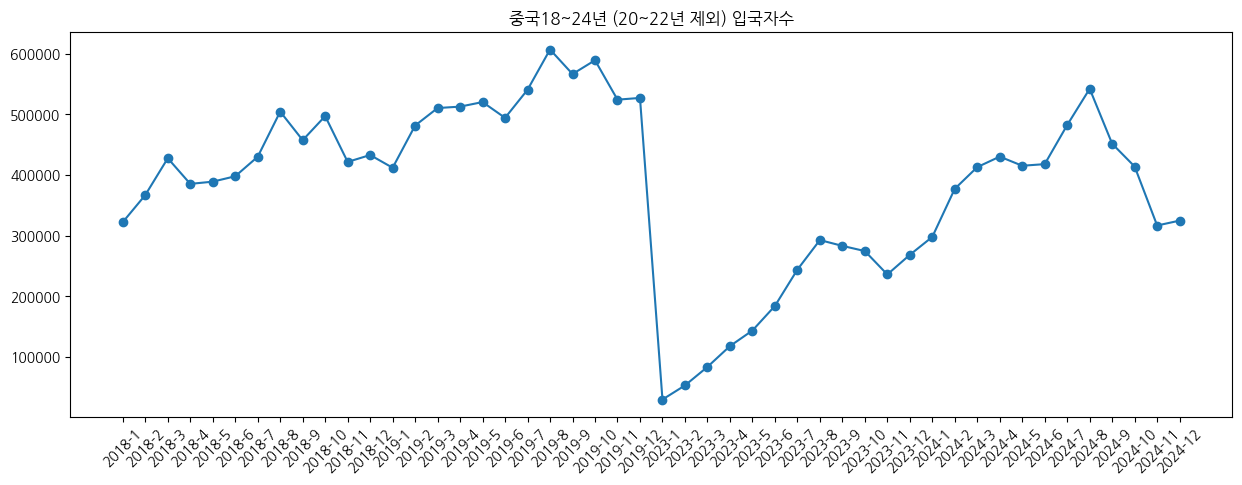

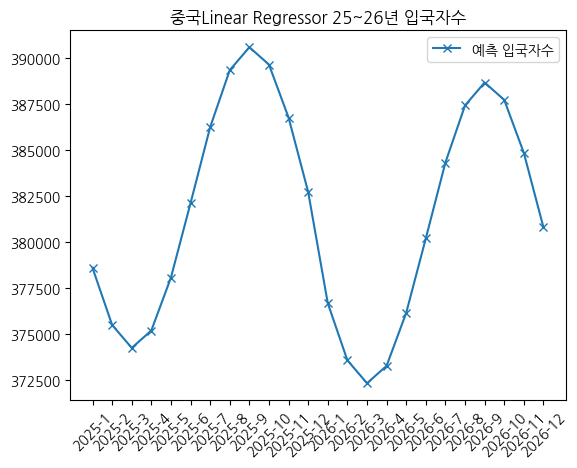

In [36]:
#과거, 미래 입국자를 그래프로 확인

import matplotlib.pyplot as plt

select_country = '중국'
#선택한 나라 데이터만 추출
select_df = df[df['국적지역']==select_country]

#입국자수 그래프
plt.figure(figsize=(15, 5))
plt.title(select_country + '18~24년 (20~22년 제외) 입국자수')
plt.plot(select_df['년'].astype(str) + '-' + select_df['월'].astype(str), select_df['입국자수'], marker='o', label='실제 입국자수')
plt.xticks(rotation=45)
plt.show()
#선택한 나라 예측입국자수 그래프
plt.title(select_country + 'Linear Regressor 25~26년 입국자수')
plt.plot(future_df[future_df['국적지역']==select_country]['년'].astype(str) + '-' + future_df[future_df['국적지역']==select_country]['월'].astype(str), future_df[future_df['국적지역']==select_country]['예측 입국자수'], marker='x', label='예측 입국자수')

plt.xticks(rotation=45)
plt.legend()
plt.show()